# Dataset Draft

Dennis Chan 15833526 

Stanley Si Lin Wu 15417190 

Michael Dong 15804232 

Sander Neele 15857719 

Groep nummer: B1 (#1) 

# Titel
Factoren die mensen zijn voorkeur voor films of series beïnvloeden

# Beschrijving

IMDb is de bekendste website voor het beoordelen van films en series en er bestaat duidelijke tegenstellingen tussen films en series. Sommige mensen vinden films beter, terwijl sommige juist series beter vinden. Maar welke factoren bepalen dan deze voorkeuren? In dit project gaan we dus de data analyseren om te bepalen wat precies deze verschillen veroorzaakt. Sommigen vinden series leuker vanwege de grote hoeveelheid detail en zij liever thuis kijken, terwijl anderen films waarderen omdat ze een compleet verhaal in korte tijd vertellen en liever in de bioscoop kijken.  

In [415]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Dataset 1: IMDB Top 1000 Movies

https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-movies 

Hoeveelheid datapunten: 1000 records
 
Hoeveelheid variabelen in de dataset: 6 variabelen 

De database bevat de top 1000 best beoordeelde films op IMDb, elk met minstens 10.000 ratings. Voor elke film is de titel, genre, aantal votes, rating en de releasedatum genoteerd. Deze gegevens zijn verkregen via een (onofficiële) IMDb API en kunnen inzicht geven in trends en voorkeuren van gebruikers. 

In [416]:
data = pd.read_csv('data/movies.csv')
data.head(n=10)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0111161,The Shawshank Redemption,Drama,9.3,3057007,1994
1,tt0068646,The Godfather,"Crime, Drama",9.2,2134065,1972
2,tt0252487,The Chaos Class,Comedy,9.2,44602,1975
3,tt33175825,Attack on Titan the Movie: The Last Attack,"Action, Adventure, Animation",9.2,17305,2024
4,tt0259534,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",9.1,16474,1993
5,tt0468569,The Dark Knight,"Action, Crime, Drama",9.0,3031913,2008
6,tt0167260,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",9.0,2085825,2003
7,tt0108052,Schindler's List,"Biography, Drama, History",9.0,1529796,1993
8,tt0071562,The Godfather Part II,"Crime, Drama",9.0,1435894,1974
9,tt0050083,12 Angry Men,"Crime, Drama",9.0,931547,1957


# Dataset 2: IMBD Top 1000 Series


https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-tv-series 

Hoeveelheid datapunten: 1000 records 

Hoeveelheid variabelen in de dataset: 6 variabelen


De database bevat een top 1000 top rated TV series in IMDb met minstens 10000 ratings. Daarin staat de titel, genre, aantal votes, rating en de releasedatum van de film. De data is verkregen door middel van een (Onofficieel) IMDb API, te vinden op RapidAPI. 


In [417]:
data = pd.read_csv('data/tvseries.csv')
data.head(n=10)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2341969,2008
1,tt0185906,Band of Brothers,"Action, Drama, History",9.4,564041,2001
2,tt0795176,Planet Earth,"Documentary, Family",9.4,227819,2006
3,tt5491994,Planet Earth II,Documentary,9.4,166992,2016
4,tt5152226,Tree of Life,Drama,9.4,18826,2014
5,tt7366338,Chernobyl,"Drama, History, Thriller",9.3,954055,2019
6,tt0417299,Avatar: The Last Airbender,"Action, Adventure, Animation",9.3,408049,2005
7,tt0306414,The Wire,"Crime, Drama, Thriller",9.3,404808,2002
8,tt30263074,Sapne Vs Everyone,Drama,9.3,73898,2023
9,tt6769208,Blue Planet II,Documentary,9.3,52095,2017


De Data's worden met elkaar gemerged op basis van de benodigheden om grafieken te maken. De eerste wordt gedaan waarbij de votes van elk jaar bij elkaar wordt opgeteld van alle films en series van dat jaar en dat wordt totale votes. De tweede wordt gedaan waarbij de gemiddelde wordt berekend van de gemiddelde rating van alle films en series per jaar.

# Dataset Preprocessing 1

In [418]:
# Laad beide CSV-bestanden
df1 = pd.read_csv("data/movies.csv")  # Hier zit bijvoorbeeld 'Country' in
df2 = pd.read_csv("data/tvseries.csv")  # Hier zit 'Location' i.p.v. 'Country' in

# Voeg een 'type' kolom toe om films/series te onderscheiden
df1["type"] = "film"
df2["type"] = "serie"

# Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# Groepeer per releaseYear en tel votes op
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "numVotes": "sum",  # Tel alle votes op per jaar
        "title": lambda x: " | ".join(x),  # Combineer titels met scheidingsteken
        "type": lambda x: " + ".join(x)    # Combineer types (film + serie)
    })
    .rename(columns={"title": "titles_combined"})  # Hernoem voor duidelijkheid
)


result.to_csv("data/combined_votes_by_year.csv", index=True)

# Data Preprocessing 2

In [419]:
# 1. Laad beide CSV-bestanden
df1 = pd.read_csv("data/movies.csv")  # Films
df2 = pd.read_csv("data/tvseries.csv")  # Series

# 2. Voeg een 'type' kolom toe
df1["type"] = "film"
df2["type"] = "serie"

# 3. Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# 4. Bereken gemiddelde rating per jaar
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "averageRating": "mean",  # Gemiddelde rating per jaar
        "numVotes": "sum",        # Totale votes per jaar (optioneel)
        "title": lambda x: x.nunique(),  # Aantal unieke titels per jaar
        "type": lambda x: ", ".join(x.unique())  # Unieke types per jaar
    })
    .rename(columns={
        "averageRating": "mean_rating",
        "numVotes": "total_votes",
        "title": "unique_titles_count"
    })
)

# 5. Sla het resultaat op
result.to_csv("data/combined_stats_by_year.csv", index=True)

# Perspectief 1

In onze moderne social media zijn zowel films als series populair, maar toch hebben ze andere behoeftes. Films bieden een korte en eenmalige beleving met relatief weinig inspanning, terwijl series veel langer zijn, waardoor  meer karakterontwikkeling en een diepere verhaallijn mogelijk is. Daarnaast sluit het kijken van series thuis beter aan bij de levensstijl van vandaag dankzij  Netflix en HBO. Door de coronapandemie zal deze trend nog meer versterkt worden, omdat mensen meer tijd thuis doorbrachten, is het seriekijken verder toegenomen.  Onze analyse van IMDB top 1000 films en top 1000 series bevestigt dat series over het algemeen van hoger kwaliteit zijn en daardoor ook hoger scoren dan films. 

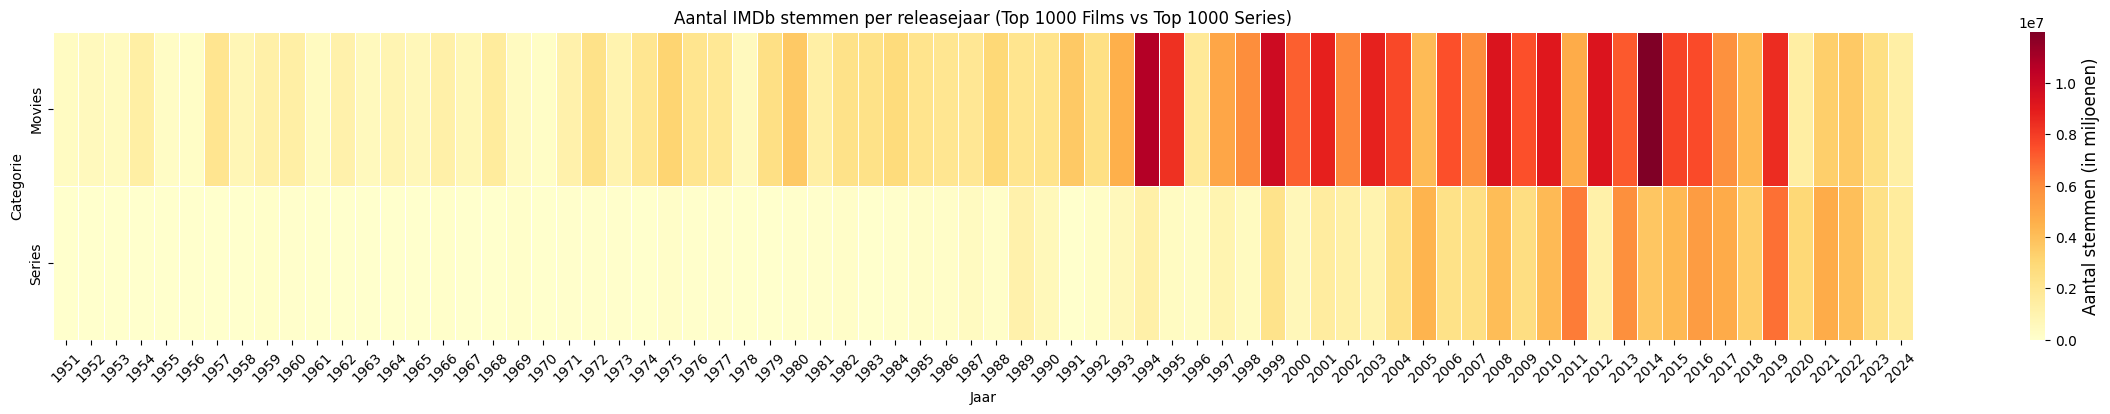

In [420]:


############# FILMS + SERIES APART######################### 



# --- Movies ---
movies_df = pd.read_csv("data/movies.csv")
movies_votes = movies_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
movies_votes.name = 'Movies'

# --- Series ---
series_df = pd.read_csv("data/tvseries.csv")
series_votes = series_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
series_votes.name = 'Series'

# Combine into one DataFrame for heatmap (rows = categorieën, columns = jaren)
heatmap_df = pd.concat([movies_votes, series_votes], axis=1).T

plt.figure(figsize=(30, 4))
ax = sns.heatmap(
    heatmap_df,
    cmap='YlOrRd',
    cbar=True,
    xticklabels=range(1951, 2025),
    linewidths=0.5,
    linecolor='white'
)

# Colorbar label aanpassen
colorbar = ax.collections[0].colorbar
colorbar.set_label('Aantal stemmen (in miljoenen)', fontsize=12)

# Formatter instellen: toon als miljoenen

plt.title('Aantal IMDb stemmen per releasejaar (Top 1000 Films vs Top 1000 Series)')
plt.xlabel('Jaar')
plt.ylabel('Categorie')
plt.xticks(rotation=45)
plt.show()

In deze grafiek wordt er een vergelijking gemaakt tussen aantal votes van de films en series door de jaren heen. In de Y-as zit de verdeling tussen series en films en in de X-as zitten de jaren. Aan de rechterkant van de grafiek zit de legenda waar de aantal votes op miljoenen wordt gezet, met dat gezegd hoe donkerder het is hoe meer votes er zijn in dat bepaald jaar. Hieruit kunnen we zien hoe donkerder de reep in dat bepaald jaar hoe meer votes er intotaal zijn in dat jaar en hoe lichter de reep in dat bepaald jaar hoe minder votes er intotaal zijn in dat jaar.

# Argument 1: 
We zien dat films veel meer stemmen krijgt dan series, wat blijkt uit de heat graph (grafiek hierboven). De films zijn duideliujk roder (dus meer stemmen) voor alle bijna alle jaren. Dat betekent dat kwalitatieve films significant meer worden bekeken. Films kregen sinds 1980 duidelijk ook meer stemmen. Tot ongeveer 2005 is er vrijwel geen bijzondere activiteit voor series zichtbaar, tot de opkomst van streamingsdiensten als netflix.  Daarnaast is het opvallend dat in recentere jaren rond 2020-2024 series juist populairder zijn, door de coronapandemie. Dit zien we ook terug in de grafiek hieronder.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



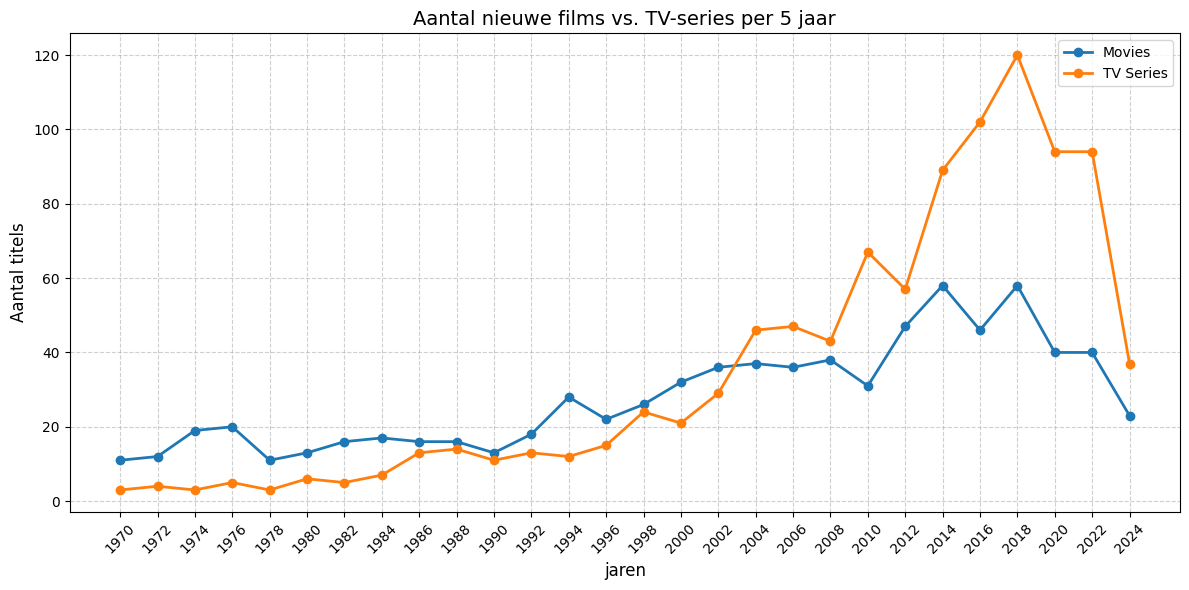

In [421]:
movies = pd.read_csv('data/movies.csv')
tvseries = pd.read_csv('data/tvseries.csv')

# Functie om jaren af te ronden naar 5-jarige intervallen
def round_to_5yr(year):
    return (year // 2) * 2

# Rond alle releaseYear af
movies['releasePeriod'] = movies['releaseYear'].apply(round_to_5yr)
tvseries['releasePeriod'] = tvseries['releaseYear'].apply(round_to_5yr)

# Tel aantal titels per periode
movies_per_period = movies['releasePeriod'].value_counts().sort_index()
tvseries_per_period = tvseries['releasePeriod'].value_counts().sort_index()

# Combineer in één DataFrame
combined = pd.DataFrame({
    'Movies': movies_per_period,
    'TV Series': tvseries_per_period
}).fillna(0).astype(int)

# Zorg dat alle 5-jaarlijkse perioden van 1970 t/m 2020 aanwezig zijn
all_periods = list(range(1970, 2026, 2))  # 1970, 1975, ..., 2020
combined = combined.reindex(all_periods, fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Movies'], label='Movies', marker='o', linewidth=2)
plt.plot(combined.index, combined['TV Series'], label='TV Series', marker='o', linewidth=2)

# Titel en labels
plt.title('Aantal nieuwe films vs. TV-series per 5 jaar', fontsize=14)
plt.xlabel('jaren', fontsize=12)
plt.ylabel('Aantal titels', fontsize=12)
plt.xticks(combined.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In deze grafiek wordt een vergelijking gemaakt tussen aantal titels in de top 1000 die gepubliceerd is per jaar. In de Y-as wordt het aantal titels aangegeven en in de X-as wordt de jaren aangegeven. Vervolgens geeft de blauwe lijn de aantal gepubliceerde films en de oranje lijn de aantal gepubliceerde series. Uit de grafiek kunnen we halen hoeveel series en films er gepubliceerd wordt per jaar. Gecombineerd kunnen we zien hoe de films en series publicaties is gestegen door de jaren heen.

# Argument 2
Series worden steeds populair over de jaren heen en als je kijkt naar de grafiek "Aantal nieuwe films vs. TV-series per 5 jaar" kan je zien dat 2003 het aantal uitgebrachte series (in de top 1000) meer werd vergeleken met films. Dus films waren historisch populairder, maar series zijn sinds 2003 veel populairder geworden. 


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Argument 3

UIt de grafiek zien we dus dat films aanzienlijk meer stemmen ontvangen dan tv-series, dit verschil kan worden verklaard doordat dfilms over het algemeen korter zijn en daardoor dus makkelijker en sneller bekeken worden. Ze zijn dus toegankelijker voor een breder publiek, waardoor er dus ook meer stemmen en beoordelingen zijn. 

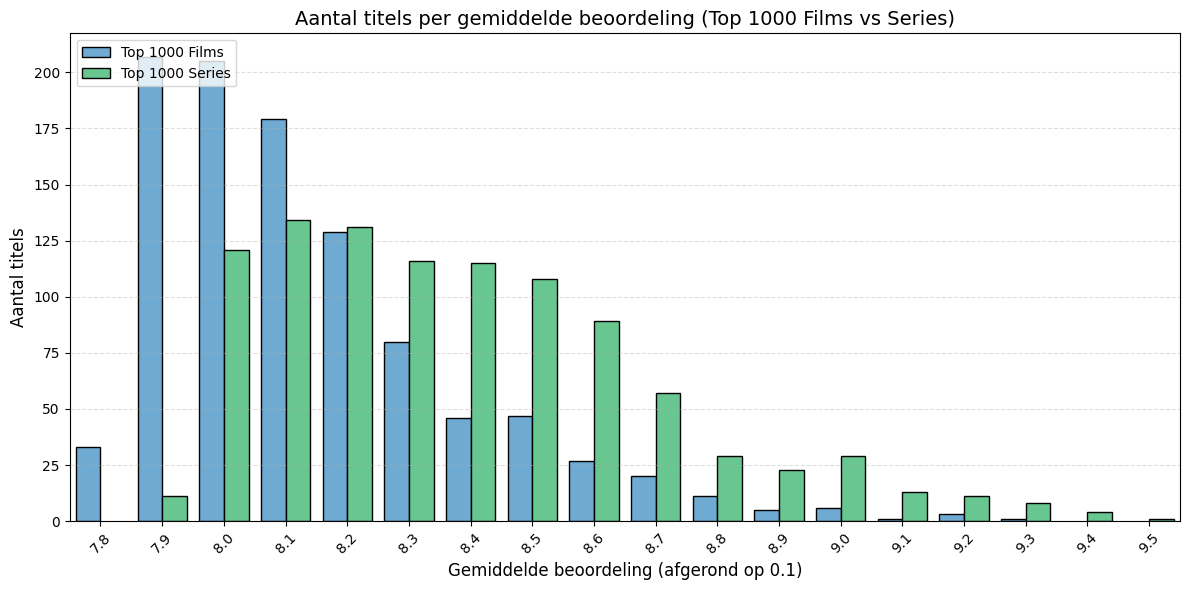

In [422]:
# Load data
movies_df = pd.read_csv("data/movies.csv")
series_df = pd.read_csv("data/tvseries.csv")

# Count number of titles per rating
movies_counts = movies_df["averageRating"].value_counts().sort_index()
series_counts = series_df["averageRating"].value_counts().sort_index()

# Combine into one DataFrame
combined_df = pd.DataFrame({
    "rating": movies_counts.index.tolist() + series_counts.index.tolist(),
    "count": list(movies_counts.values) + list(series_counts.values),
    "type": ["Top 1000 Films"] * len(movies_counts) + ["Top 1000 Series"] * len(series_counts)
})

# Round ratings to 1 decimal for nicer grouping
combined_df["rating"] = combined_df["rating"].round(1)

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_df,
    x="rating",
    y="count",
    hue="type",
    palette=["#5DADE2", "#58D68D"],
    edgecolor="black"

)

plt.title("Aantal titels per gemiddelde beoordeling (Top 1000 Films vs Series)", fontsize=14)
plt.xlabel("Gemiddelde beoordeling (afgerond op 0.1)", fontsize=12)
plt.ylabel("Aantal titels", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="", loc="upper left")
plt.tight_layout()
plt.show()

In deze grafiek wordt een vergelijking gemaakt tussen aantal films met een bepaald rating. In de Y-as wordt de aantal films en series van de top 1000 aangegeven en in de X-as de ratingen. De blauwe balk geeft de aantal films aan en de groene balk geeft de aantal series aan. Hieruit kunnen we zien hoeveel films en series een bepaald rating heeft.

# Argument 4

Films blijven voornamelijk in het 7.9-8.1 bereik. Series domineren consistent vanaf 8.3 tot 9.5. Opmerkelijk is dat bij 8.2 nog gelijkheid is, maar daarna hebben series duidelijk hogere scores. Dus hoewel films meer stemmen krijgt. Dit suggeert dat series meer wordt gewaardeerd dan films. 

In [427]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Laad beide datasets
movies_data = pd.read_csv('data/movies.csv')
series_data = pd.read_csv('data/tvseries.csv')

# Functie om data voor te bereiden
def prepare_data(data):
    data_exploded = data.assign(genres=data['genres'].str.split(', ')).explode('genres')
    genre_counts = data_exploded['genres'].value_counts()
    top_genres = genre_counts[genre_counts > 10].index
    filtered_data = data_exploded[data_exploded['genres'].isin(top_genres)]
    return filtered_data, top_genres

# Bereid beide datasets voor
movies_filtered, movies_genres = prepare_data(movies_data)
series_filtered, series_genres = prepare_data(series_data)

# Alle unieke genres voor de genre dropdown
all_genres = sorted(set(movies_genres) | set(series_genres))

# Vind gemeenschappelijke genres voor vergelijking
common_genres = list(set(movies_genres) & set(series_genres))
common_genres.sort()

# Maak een gecombineerde figuur
fig = go.Figure()

# Keep track of trace information for proper filtering
trace_info = []

# Voeg movie traces toe (standaard onzichtbaar)
movies_fig = px.box(movies_filtered,
                    x='genres',
                    y='averageRating',
                    color='genres',
                    points='outliers',
                    hover_data=['title'])

for trace in movies_fig.data:
    trace.visible = False
    genre_name = trace.name.replace('genres=', '')
    trace.name = f"Films - {genre_name}"
    trace.legendgroup = "films"
    fig.add_trace(trace)
    trace_info.append({'type': 'movies', 'genre': genre_name})

# Voeg series traces toe (standaard onzichtbaar)  
series_fig = px.box(series_filtered,
                    x='genres', 
                    y='averageRating',
                    color='genres',
                    points='outliers',
                    hover_data=['title'])

for trace in series_fig.data:
    trace.visible = False
    genre_name = trace.name.replace('genres=', '')
    trace.name = f"Series - {genre_name}"
    trace.legendgroup = "series"
    fig.add_trace(trace)
    trace_info.append({'type': 'series', 'genre': genre_name})

# Voeg vergelijkingstraces toe voor gemeenschappelijke genres (standaard zichtbaar)
for genre in common_genres:
    # Films data voor dit genre
    movies_genre_data = movies_filtered[movies_filtered['genres'] == genre]
    fig.add_trace(go.Box(
        y=movies_genre_data['averageRating'],
        x=[f"{genre} - Films"] * len(movies_genre_data),
        name=f"Films - {genre}",
        marker_color=px.colors.qualitative.Plotly[common_genres.index(genre) % len(px.colors.qualitative.Plotly)],
        boxpoints='outliers',
        customdata=movies_genre_data[['title']],
        hovertemplate='<b>%{x}</b><br>Rating: %{y}<br>Titel: %{customdata[0]}<extra></extra>',
        visible=True,
        legendgroup="comparison"
    ))
    trace_info.append({'type': 'comparison_movies', 'genre': genre})
    
    # Series data voor dit genre
    series_genre_data = series_filtered[series_filtered['genres'] == genre]
    fig.add_trace(go.Box(
        y=series_genre_data['averageRating'],
        x=[f"{genre} - Series"] * len(series_genre_data),
        name=f"Series - {genre}",
        marker_color=px.colors.qualitative.Plotly[common_genres.index(genre) % len(px.colors.qualitative.Plotly)],
        boxpoints='outliers',
        customdata=series_genre_data[['title']],
        hovertemplate='<b>%{x}</b><br>Rating: %{y}<br>Titel: %{customdata[0]}<extra></extra>',
        visible=True,
        opacity=0.6,
        legendgroup="comparison"
    ))
    trace_info.append({'type': 'comparison_series', 'genre': genre})

# Bereken counts
movies_count = len([t for t in trace_info if t['type'] == 'movies'])
series_count = len([t for t in trace_info if t['type'] == 'series'])
comparison_count = len([t for t in trace_info if t['type'].startswith('comparison')])

# Maak genre filter buttons dynamisch
def create_genre_buttons():
    # Alle genres button
    buttons = [{
        "label": "Alle genres",
        "method": "restyle",
        "args": [{"visible": [True] * len(trace_info)}]
    }]
    
    for genre in all_genres:
        # Maak visibility array voor dit genre
        visibility = []
        
        for trace in trace_info:
            # Show trace if it matches the selected genre
            visibility.append(trace['genre'] == genre)
        
        buttons.append({
            "label": genre,
            "method": "restyle", 
            "args": [{"visible": visibility}]
        })
    
    return buttons

# Update layout
fig.update_layout(
    title='Vergelijking van films vs series per genre (hover over outliers voor titel)',
    updatemenus=[
        # Films/Series/Vergelijking schakelaar
        {
            "buttons": [
                {
                    "label": "Films",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'] == 'movies' for t in trace_info]},
                        {"title": "Ratingverdeling per genre voor films (hover over outliers voor titel)"}
                    ]
                },
                {
                    "label": "Series",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'] == 'series' for t in trace_info]},
                        {"title": "Ratingverdeling per genre voor series (hover over outliers voor titel)"}
                    ]
                },
                {
                    "label": "Vergelijking",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'].startswith('comparison') for t in trace_info]},
                        {"title": "Vergelijking van films vs series per genre (hover over outliers voor titel)"}
                    ]
                }
            ],
            "direction": "down",
            "showactive": True,
            "active": 2,
            "x": 0.02,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        },
        # Genre filter - werkt op de momenteel zichtbare data
        {
            "buttons": create_genre_buttons(),
            "direction": "down",
            "showactive": True,
            "x": 0.15,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        }
    ],
    xaxis_title="Genre",
    yaxis_title="Gemiddelde IMDb-rating",
    height=600,
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Arial"),
    showlegend=False
)

fig.show()

In deze grafiek worden series vergeleken met films met de gemiddelde rating per genre. De Y-as geeft de gemiddelde beoordeeling aan en de X-as geeft de genres aan. In de grafiek geeft een vierkant de series aan en een bol de films aan. De grootte van de vierkant geeft het aantal series aan (hoe groter hoe meer series). En de grootte van de bol geeft het aantal films aan (hoe groter hoe meer films). Uit deze grafiek kunnen we zien hoeveel films en series van een bepaald genre een bepaald rating heeft.

# Argument 5

De gemiddelde rating per genre is voor tv series natuurlijk hoger dan films dan ook. Over het algemeen zien we dat voor movies het allemaal rond de 8.1-8.2 zit voor elke genre, terwijl voor tv series de meeste zitten op 8.3 tot 8.4. Daarnaast zien we dat oorlogsseries een 8.7 rating scoren, en documentseries met 8.6. Dit zijn zeer hoge ratings vergeleken met de andere genres die rond de 8.1-8.2 zitten. OOk familie, geschiedenis, gameshows presteren goed met een gemiddelde van 8.5. We kunnen dus concluderen dat series domineren vanaf 8.3 tot aan de top van de ratingschaal. 















# Perspectief 2

Moderne films en series hebben betere technologieën zoals CGI en de hogere productiebudget, waardoor ze dus visueel er beter uit zien. Aan de andere kant hebben we oude klassieke films die vaak meer echte verhalen hebben zonder te veel computer trucjes. Hierdoor moesten de acteurs juist goed acteren. Daarom kijken mensen deze films nog steeds deze klassiekers. 



# Argument 1
Hoewel meeste mensen van moderne films houden, zien we nogsteeds dat er mensen zijn die genieten van ouderwetse films door hun acteurstijl. Het is te zien aan de heatmap. Er bestaat nog steeds votes in 1920 tot 1980

# Argument 2
Moderne films en series kunnen een hogere vote hebben dan films en series in het verleden, omdat moderne films meer gepromote en geadvertiseert worden dan films en series uit het verleden. Toch worden films en series uit het verleden even goed gewaardeerd als de films en series tegenwoordig. Dit is te zien aan figuur heatmap, mindervote in jaren 1920 tot 1980 en figuur areaplot, waar de rating door de jaren heen ongeveer even hoog staat. 

# Gemiddelde filmrating per jaar

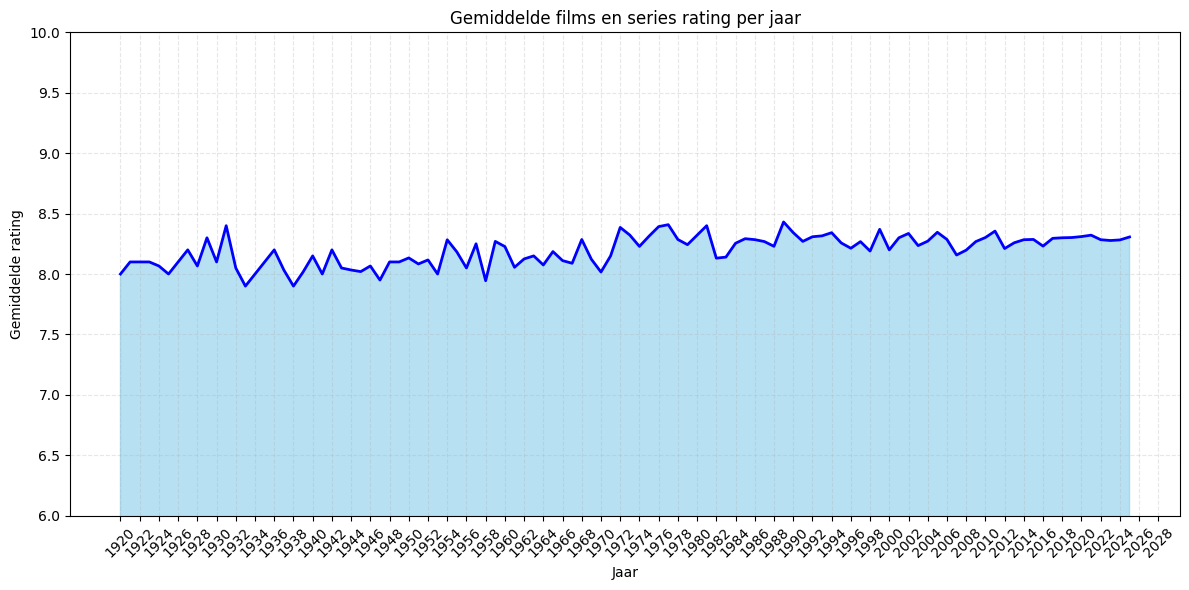

In [424]:
# Laad je data
df = pd.read_csv("data/combined_stats_by_year.csv")

# Bereken gemiddelde rating per jaar
avg_rating_by_year = df.groupby("releaseYear")["mean_rating"].mean()

# Plot als area plot
plt.figure(figsize=(12, 6))
plt.fill_between(avg_rating_by_year.index, avg_rating_by_year.values, color="skyblue", alpha=0.6)
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color="blue", linewidth=2)

plt.title("Gemiddelde films en series rating per jaar")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde rating")
plt.ylim(6, 10)  # Forceer y-as van 6 tot 10
plt.grid(alpha=0.3, linestyle="--")
plt.xticks(
    range(avg_rating_by_year.index.min(), avg_rating_by_year.index.max() + 4, 2),  # Om de 5 jaar
    rotation=45
)

plt.tight_layout()
plt.show()

In deze grafiek wordt een vergelijking gemaakt tussen de gemiddelde rating van alle films en series van elk jaar. In de Y-as wordt de gemiddelde rating aangegeven en in de X-as wordt de jaren aangegeven. Uit de grafiek kunnen we halen wat de gemiddelde rating is van alle films en series van een bepaald jaar. En zo kunnen we zien welk jaar een hogere gemiddelde rating heeft vergeleken met andere jaren.

# Argument 3 
Alleen bij de meest bekeken films (met meer dan één miljoen stemmen) is een duidelijke stijging in de gemiddelde beoordeling zichtbaar, zoals te zien is in de regressiegrafiek. Voor het grootste deel van de dataset blijft het verband tussen populariteit (aantal stemmen) en waardering echter zwak. Minder bekende films scoren dus vaak net zo goed als blockbusters.

# Argument 4 
Hoge ratings van oude films tonen aan dat kwaliteit en verhaal universeel blijven aanspreken, zelfs zonder moderne technieken

# Argument 5 
Films met meer dan 1 miljoen stemmen hebben veel verschil in beoordeling. Sommige mensen geven een hoge score, anderen juist lager. Dat betekent dat bekende moderne films niet door iedereen goed gevonden worden. Minder bekende films scoren juist vaker gemiddeld. Dit laat zien dat een groot budget en veel techniek niet altijd zorgen voor een betere waardering.

# Boxplot: Beoordeling per stemcategorie

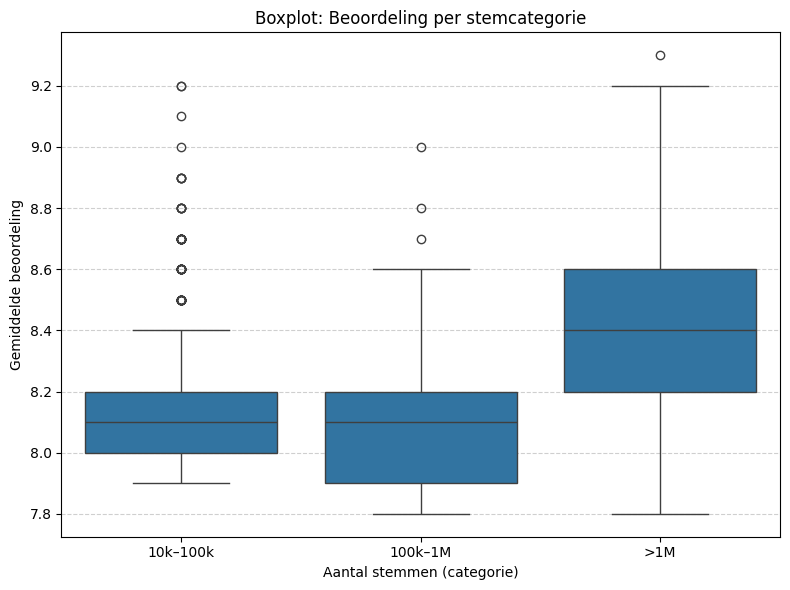

In [425]:
df = pd.read_csv("data/movies.csv") 

# Categoriseer het aantal stemmen
bins = [10000, 100000, 1000000, float('inf')]
labels = ['10k–100k', '100k–1M', '>1M']
df['vote_category'] = pd.cut(df['numVotes'], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='vote_category', y='averageRating')
plt.xlabel('Aantal stemmen (categorie)')
plt.ylabel('Gemiddelde beoordeling')
plt.title('Boxplot: Beoordeling per stemcategorie')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In deze grafiek wordt een vergelijking gemaakt tussen de gemiddelde beoordeling en de aantal stemmen. In de Y-as wordt de gemiddelde rating aangegeven en in de X-as wordt de aantal stemmen aangegeven. De X-as wordt verdeeld in 3 stukken waar de eerste stuk de aantal stemmen weergeeft tussen 10.000 en 100.000 en de tweede stuk tussen 100.000 en 1.000.000 en de derde stuk hoger dan 1.000.000. Uit de grafiek kunnen we zien hoe het aantal votes met de gemiddelde beoordeling met elkaar correleerd. Zo zien we dat hoewel sommige films weinig votes heeft kan het nogsteeds een hoge rating hebben.

In [426]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Laad beide datasets
movies_data = pd.read_csv('data/movies.csv')
series_data = pd.read_csv('data/tvseries.csv')

# Functie om data voor te bereiden
def prepare_data(data):
    data_exploded = data.assign(genres=data['genres'].str.split(', ')).explode('genres')
    genre_counts = data_exploded['genres'].value_counts()
    top_genres = genre_counts[genre_counts > 10].index
    filtered_data = data_exploded[data_exploded['genres'].isin(top_genres)]
    return filtered_data, top_genres

# Bereid beide datasets voor
movies_filtered, movies_genres = prepare_data(movies_data)
series_filtered, series_genres = prepare_data(series_data)

# Alle unieke genres voor de genre dropdown
all_genres = sorted(set(movies_genres) | set(series_genres))

# Vind gemeenschappelijke genres voor vergelijking
common_genres = list(set(movies_genres) & set(series_genres))
common_genres.sort()

# Maak een gecombineerde figuur
fig = go.Figure()

# Keep track of trace information for proper filtering
trace_info = []

# Voeg movie traces toe (standaard zichtbaar)
movies_fig = px.box(movies_filtered,
                    x='genres',
                    y='averageRating',
                    color='genres',
                    points='outliers',
                    hover_data=['title'])

for trace in movies_fig.data:
    trace.visible = True
    genre_name = trace.name.replace('genres=', '')
    trace.name = f"Films - {genre_name}"
    trace.legendgroup = "films"
    fig.add_trace(trace)
    trace_info.append({'type': 'movies', 'genre': genre_name})

# Voeg series traces toe (standaard onzichtbaar)  
series_fig = px.box(series_filtered,
                    x='genres', 
                    y='averageRating',
                    color='genres',
                    points='outliers',
                    hover_data=['title'])

for trace in series_fig.data:
    trace.visible = False
    genre_name = trace.name.replace('genres=', '')
    trace.name = f"Series - {genre_name}"
    trace.legendgroup = "series"
    fig.add_trace(trace)
    trace_info.append({'type': 'series', 'genre': genre_name})

# Voeg vergelijkingstraces toe voor gemeenschappelijke genres (standaard onzichtbaar)
for genre in common_genres:
    # Films data voor dit genre
    movies_genre_data = movies_filtered[movies_filtered['genres'] == genre]
    fig.add_trace(go.Box(
        y=movies_genre_data['averageRating'],
        x=[f"{genre} - Films"] * len(movies_genre_data),
        name=f"Films - {genre}",
        marker_color=px.colors.qualitative.Plotly[common_genres.index(genre) % len(px.colors.qualitative.Plotly)],
        boxpoints='outliers',
        customdata=movies_genre_data[['title']],
        hovertemplate='<b>%{x}</b><br>Rating: %{y}<br>Titel: %{customdata[0]}<extra></extra>',
        visible=False,
        legendgroup="comparison"
    ))
    trace_info.append({'type': 'comparison_movies', 'genre': genre})
    
    # Series data voor dit genre
    series_genre_data = series_filtered[series_filtered['genres'] == genre]
    fig.add_trace(go.Box(
        y=series_genre_data['averageRating'],
        x=[f"{genre} - Series"] * len(series_genre_data),
        name=f"Series - {genre}",
        marker_color=px.colors.qualitative.Plotly[common_genres.index(genre) % len(px.colors.qualitative.Plotly)],
        boxpoints='outliers',
        customdata=series_genre_data[['title']],
        hovertemplate='<b>%{x}</b><br>Rating: %{y}<br>Titel: %{customdata[0]}<extra></extra>',
        visible=False,
        opacity=0.6,
        legendgroup="comparison"
    ))
    trace_info.append({'type': 'comparison_series', 'genre': genre})

# Bereken counts
movies_count = len([t for t in trace_info if t['type'] == 'movies'])
series_count = len([t for t in trace_info if t['type'] == 'series'])
comparison_count = len([t for t in trace_info if t['type'].startswith('comparison')])

# Maak genre filter buttons dynamisch
def create_genre_buttons():
    # Alle genres button
    buttons = [{
        "label": "Alle genres",
        "method": "restyle",
        "args": [{"visible": [True] * len(trace_info)}]
    }]
    
    for genre in all_genres:
        # Maak visibility array voor dit genre
        visibility = []
        
        for trace in trace_info:
            # Show trace if it matches the selected genre
            visibility.append(trace['genre'] == genre)
        
        buttons.append({
            "label": genre,
            "method": "restyle", 
            "args": [{"visible": visibility}]
        })
    
    return buttons

# Update layout
fig.update_layout(
    title='Ratingverdeling per genre voor films (hover over outliers voor titel)',
    updatemenus=[
        # Films/Series/Vergelijking schakelaar
        {
            "buttons": [
                {
                    "label": "Films",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'] == 'movies' for t in trace_info]},
                        {"title": "Ratingverdeling per genre voor films (hover over outliers voor titel)"}
                    ]
                },
                {
                    "label": "Series",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'] == 'series' for t in trace_info]},
                        {"title": "Ratingverdeling per genre voor series (hover over outliers voor titel)"}
                    ]
                },
                {
                    "label": "Vergelijking",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'].startswith('comparison') for t in trace_info]},
                        {"title": "Vergelijking van films vs series per genre (hover over outliers voor titel)"}
                    ]
                }
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.02,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        },
        # Genre filter - werkt op de momenteel zichtbare data
        {
            "buttons": create_genre_buttons(),
            "direction": "down",
            "showactive": True,
            "x": 0.15,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        }
    ],
    xaxis_title="Genre",
    yaxis_title="Gemiddelde IMDb-rating",
    height=600,
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Arial"),
    showlegend=False
)

fig.show()

Dit is een interactieve grafiek. In de grafiek worden de titels, beoordeling en genre gecombineerd vergeleken